### Visualize relationship of most important features to target (lateness)
regression models chose some features which were most correlated with lateness.
hypothesis is that there are several different use cases with different root causes which lead to lateness.

Seeing is believing. 
_https://www.merriam-webster.com/dictionary/seeing%20is%20believing
Seeing is believing definition is - —used to say that when something unlikely is witnessed, the truth of its occurrence or existence can no longer be doubted._

Use data visualization to visually verify if the features identified as most important are significant use cases. If so these specific use cases can be targeted for improvement by changes to business processes and policies. Or if prediction of lateness is still important we might have more success building models for each of those cases separately instead of one predictive model for the variety of use cases which lead to lateness.

Investigated root causes of lateness to pickup. Several cases stand out: 
- 7-8am pickups have slightly elevated lateness compared to other hours of the day.
- Trips with last-minute claims. Address last-minute chaos: CD cancels, back-to-back trip conflicts, late ETA driver replacements.
- Specific drivers are a main cause. The most frequently late 20% of drivers were >=5 minutes late more than 8% of the time on 2017 data. Find leading indicators of late driver behavior to help manage the driver pool.
Hypotheses requiring data outside this dataset:
- Departing for a trip late is a likely cause of arriving late. Estimating planned departure time and location would help us dig deeper. Quantify missing GPS coordinates at departure time when driver app may be backgrounded.


1. 'avg_prior_arrived_late_seconds', 4. 'driver_previous_completed_trips' -- driver previous behavior, experience
2. 'claimed_before_trip_start_secs' -- last-minute driver replacements
3. 'origin_location_id', 10.'destination_location_id' -- geography, clusters late to pickup dropoff locations, traffic
5. 'driver_home_lon', 6. 'driver_home_lat' -- geography, clusters of late drivers, bad traffic areas
7. 'driver_id', 9. 'driver_created_at_pdt_dayofyear' -- about driver onboarding process, training, or driver experience
8. 'scheduled_starts_at_pdt_hour' -- first trip in the morning


In [1]:
fileprefix='./lateness_PREP_V11_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 216)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_4,claimed_at_pdt_hour_13,lead_organizer_created_at_pdt_hour,origin_region_name_San Francisco,created_at_pdt_month,destination_lat,origin_region_name_Orange County - North,created_at_pdt_weekday,driver_signup_before_trip_created_secs,...,scheduled_starts_at_pdt_hour_10,driver_previous_completed_trips,claimed_at_pdt_hour_1,lead_organizer_created_at_pdt_weekofyear,scheduled_starts_at_pdt_hour_12,origin_analysis_metro_name_LA,shuttle_int,lead_organizer_created_at_pdt_dayofyear,scheduled_starts_at_pdt_dayofyear,lead_organizer_platform_ios
0,5,0,0,19,0,2,34.18,0,6,18685416.0,...,0,663.0,0,26,0,1,0,185,45,1
1,6,0,0,19,0,1,34.10,0,3,16613901.0,...,0,634.0,0,26,0,1,0,185,24,1
2,7,0,0,20,0,2,34.16,0,6,18684204.0,...,0,649.0,0,26,0,1,0,185,39,1
3,8,0,0,20,0,1,34.17,0,2,17715744.0,...,0,637.0,0,26,0,1,0,185,26,1
4,9,0,0,19,0,10,34.12,0,0,7851048.0,...,0,629.0,0,26,0,1,0,185,23,1


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

#### use all observations in these visualizations instead of just using training or testing sets 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.__version__

'0.8.1'

Text(0.5,1,'Lateness v. Hour of Scheduled Start of Trip')

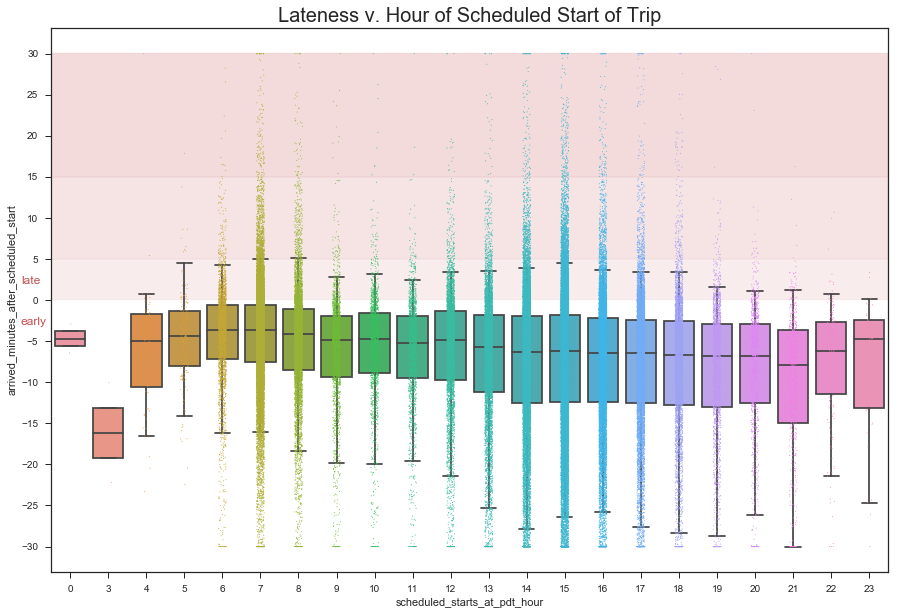

In [13]:
# start_hr vs lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
sns.stripplot(x=df_X['scheduled_starts_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=df_X['scheduled_starts_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
##plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
plt.text(-1.3,  2,  'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-1.3, -3, 'early', color='r', fontsize=12)  # annotate below 0.0 as early
##plt.axhline(y=5, color='r', linestyle=':', linewidth=0.5) # 5 minutes late reference line
##plt.axhline(y=15, color='r', linestyle=':', linewidth=0.5) # 15 minutes late reference line
xstart, xend = plt.gca().get_xlim()
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Lateness v. Hour of Scheduled Start of Trip', fontsize=20)

For trips starting 7am-8am the latest 5% of trips (above top whisker) arrive a few minutes later on average than at other times. Morning pickups (at home) probably have more visibility and importance to organizers than afternoon pickups (at school). TODO: see if late pickup complaints are for morning vs afternoon trips.
Business could respond by telling parents (organizers) to move rides 5 minutes earlier to prevent tardyness at school.
Some overall driver incentives/training/nudges, not specific to trip start time, would be helpful.

Text(0.5,1,'Lateness v. Hour of Scheduled End of Trip')

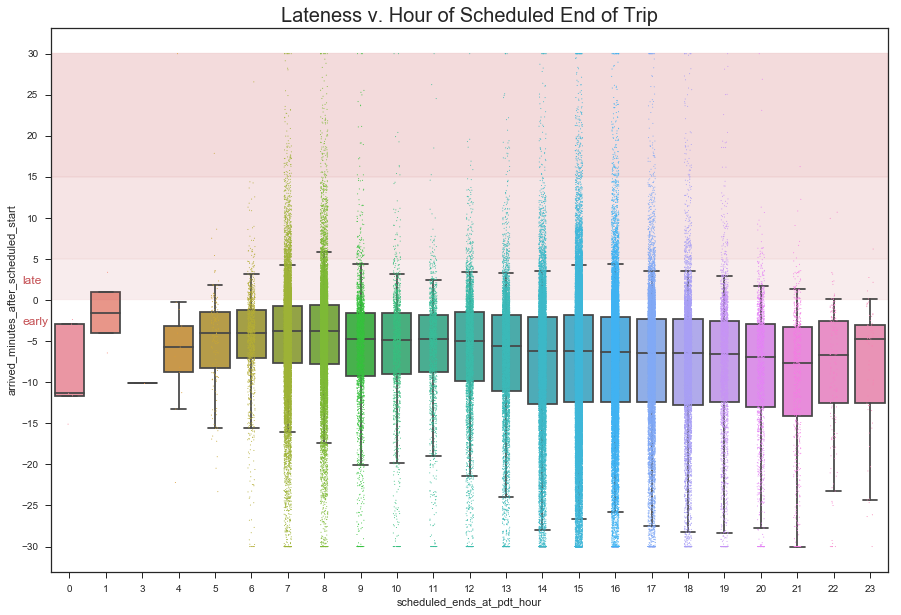

In [14]:
# ends_hr vs lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
sns.stripplot(x=df_X['scheduled_ends_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=df_X['scheduled_ends_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
plt.text(-1.3,  2,  'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-1.3, -3, 'early', color='r', fontsize=12)  # annotate below 0.0 as early
xstart, xend = plt.gca().get_xlim()
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Lateness v. Hour of Scheduled End of Trip', fontsize=20)

Text(0,0.5,'arrived_minutes_after_scheduled_start')

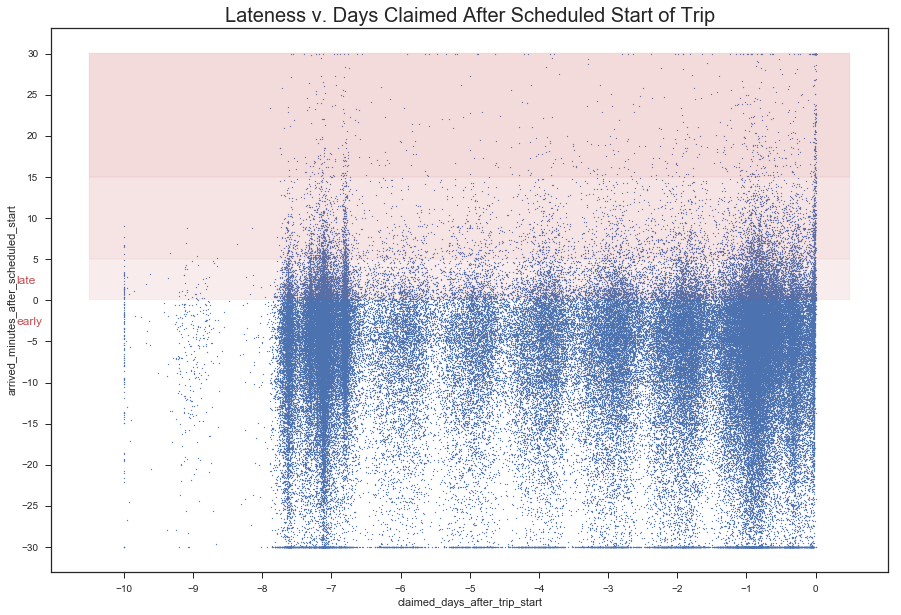

In [15]:
# claimed_before_trip_start_secs vs lateness
# if I upgrade to seaborn 9.0 I can get sns.scatterplot which is a bit nicer interface
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_days_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(24*60*60) # convert seconds to days
plt.scatter(x=df_xadj['claimed_days_after_trip_start'], y=df_y['arrived_minutes_after_scheduled_start'], s=1, alpha=1)
## sns.lmplot seems buggy with size=1
##df_xy=pd.DataFrame()
##df_xy['claimed_days_after_trip_start']=df_xadj['claimed_days_after_trip_start']
##df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
##sns.lmplot(x='claimed_days_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy, fit_reg=False, size=1)
##sns.boxplot(x=df_xadj['claimed_days_after_trip_start'].round(0), y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*abs(xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*abs(xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip', fontsize=20)
plt.xlabel('claimed_days_after_trip_start')
plt.ylabel('arrived_minutes_after_scheduled_start')

This tells us nothing but shows some interesting patterns in claiming behavior... rides claimed at or after schedule trip start arrive late (no suprise). Also... lots of claiming within a day of the start of ride; possibly due to same day rides (no suprise). Also... lots of claiming action 7 days before; this is when upcoming rides enter the marketplace (no suprise). Also... a daily trend indicative of organizers and drivers sleeping at night (no suprise). Also... truncation on both axes; an artifact of how I chose to show long tails on this plot. 

Text(0,0.5,'arrived_minutes_after_scheduled_start')

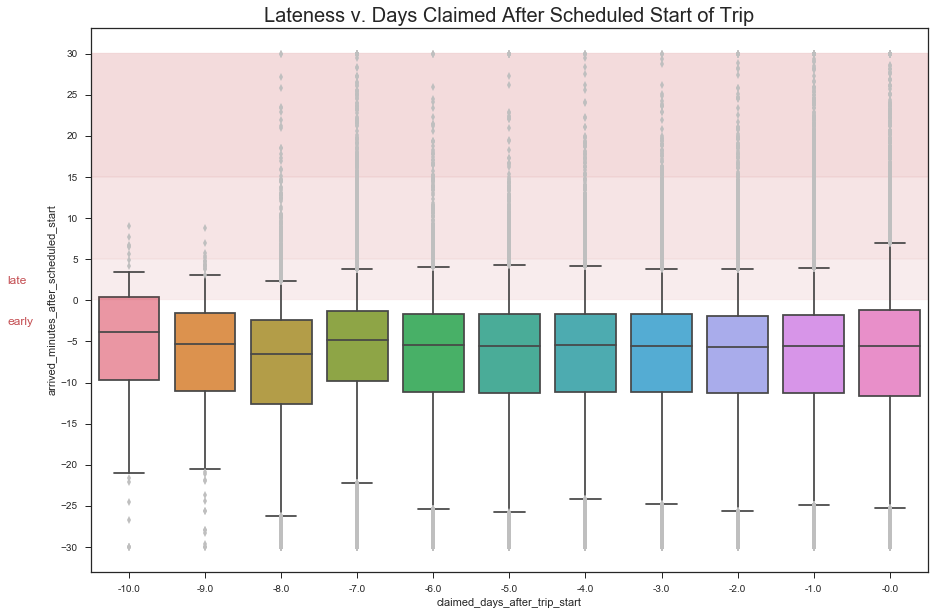

In [16]:
# claimed_before_trip_start_secs vs lateness
# do separate boxplot by day
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_days_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(24*60*60) # convert seconds to days
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x=df_xadj['claimed_days_after_trip_start'].round(0), y=df_y['arrived_minutes_after_scheduled_start'], 
            whis=[5, 95], showfliers=True, flierprops=flierprops)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip', fontsize=20)
plt.xlabel('claimed_days_after_trip_start')
plt.ylabel('arrived_minutes_after_scheduled_start')

This tells is there are significant lateness problems, not on average, but in the tail 5% on the day of the ride.

(33950, 2)


Text(0.5,1,'Lateness v. Days Claimed After Scheduled Start of Trip (claimed on day of trip)')

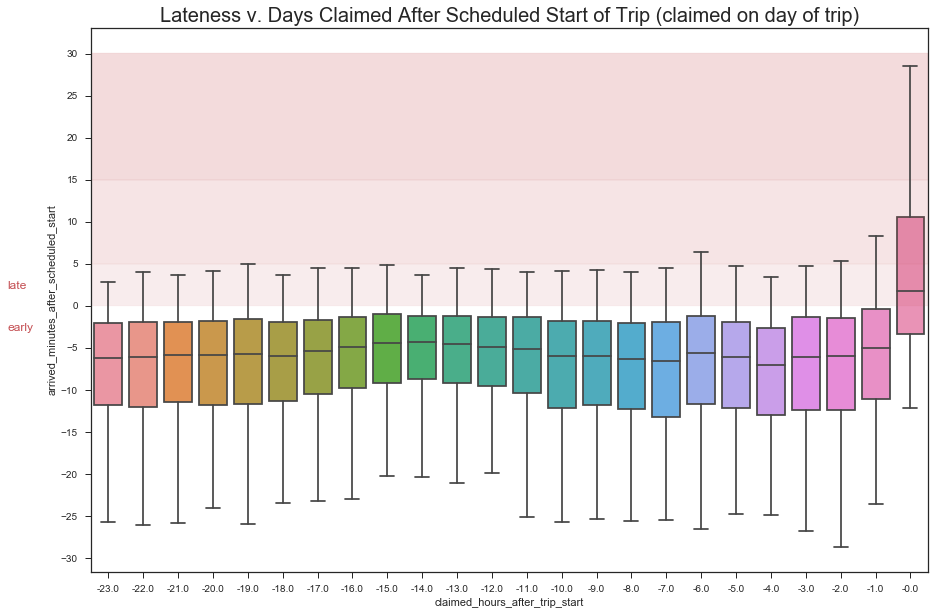

In [17]:
# claimed_before_trip_start_secs vs lateness
# lets zoom in on the day of the ride and do boxplot by hour
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_hours_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to hours
df_xy=pd.DataFrame()
df_xy['claimed_hours_after_trip_start']=df_xadj['claimed_hours_after_trip_start'].round(0)
df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
df_xy_day_of_trip=df_xy[df_xy.claimed_hours_after_trip_start > -24.0]
print(df_xy_day_of_trip.shape)
sns.boxplot(x='claimed_hours_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip (claimed on day of trip)', fontsize=20)

This tells us the problems are in the last 1 or 2 hours before the trip starts.

(80642, 2)


Text(0.5,1,'Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)')

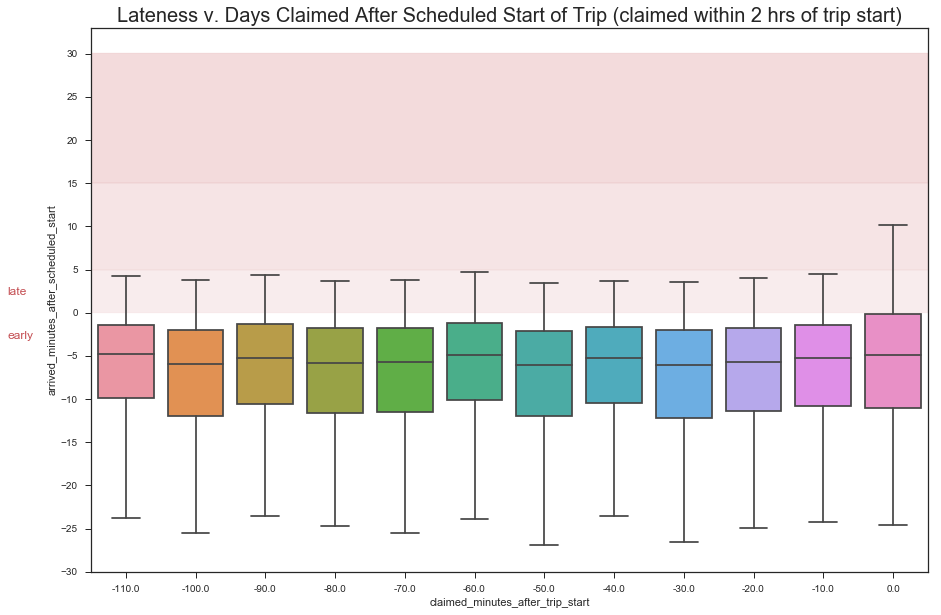

In [18]:
# claimed_before_trip_start_secs vs lateness
# lets zoom in on the day of the ride and do boxplot by 10 min for last 2 hours
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_minutes_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to minutes
df_xy=pd.DataFrame()
df_xy['claimed_minutes_after_trip_start']=df_xadj['claimed_minutes_after_trip_start'].round(-1)
df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
df_xy_day_of_trip=df_xy[df_xy.claimed_minutes_after_trip_start > -120.0]
print(df_xy_day_of_trip.shape)
sns.boxplot(x='claimed_minutes_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)', fontsize=20)

This tells us the driver is still on time as much as usual if the ride was claimed before 10 minutes. Its only in the last 10 minutes that there is a significant lateness issue! Too good to be true! This is survivor bias. Rides get canceled if the driver is going to be very late. That case does not show up in this data! So we have to worry about last minute user cancels which is a somewhat different issue than lateness.

In [19]:
# break df_X,y into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)

In [20]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100540, 216)
(25135, 216)
(100540,)
(25135,)


In [21]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [22]:
# fit model
model=model.fit(X_train,y_train)

In [23]:
print(model.feature_importances_)

[1.78644517e-02 4.90139475e-04 1.89679446e-03 4.95982258e-03
 0.00000000e+00 6.16081653e-05 1.07851849e-02 0.00000000e+00
 1.07082591e-03 1.54254138e-02 0.00000000e+00 6.51418857e-04
 0.00000000e+00 1.19692972e-03 1.91165747e-03 0.00000000e+00
 3.04428028e-04 4.18482230e-03 4.15630074e-04 2.54121416e-03
 0.00000000e+00 5.01483897e-05 1.54066012e-04 0.00000000e+00
 4.15251283e-04 1.26115883e-02 2.08080759e-05 3.48820467e-02
 4.78938688e-02 8.36075292e-04 0.00000000e+00 0.00000000e+00
 3.28384406e-03 7.28246026e-03 6.10892945e-03 0.00000000e+00
 1.09856367e-03 0.00000000e+00 0.00000000e+00 1.27181759e-02
 1.46798471e-02 1.61604468e-03 0.00000000e+00 1.44550544e-02
 6.81900387e-04 1.01786669e-03 2.30761370e-04 1.65136514e-03
 3.50960063e-03 3.03125746e-04 5.64902394e-05 0.00000000e+00
 0.00000000e+00 1.73205079e-01 5.24575429e-04 0.00000000e+00
 9.92686779e-03 1.72719246e-02 2.49771372e-03 1.36681671e-02
 0.00000000e+00 9.94062125e-04 8.16057081e-03 4.79931085e-03
 1.54912945e-02 0.000000

In [24]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.17320507852071393, 'avg_prior_arrived_late_seconds'),
 (0.04789386881895214, 'claimed_before_trip_start_secs'),
 (0.03529646369737171, 'origin_location_id'),
 (0.03488574199261876, 'driver_previous_completed_trips'),
 (0.03488204669324041, 'driver_home_lon'),
 (0.0333310119660214, 'driver_home_lat'),
 (0.033309202658305635, 'driver_id'),
 (0.024951037796717417, 'scheduled_starts_at_pdt_hour'),
 (0.023361286096700802, 'driver_created_at_pdt_dayofyear'),
 (0.022689174438655244, 'destination_location_id'),
 (0.022292254225859665, 'origin_lon'),
 (0.017864451665380962, 'Unnamed: 0'),
 (0.01727192463683992, 'trip_created_before_trip_start_secs'),
 (0.015491294476992728, 'driver_created_at_pdt_day'),
 (0.015425413842162087, 'driver_signup_before_trip_created_secs'),
 (0.014679847129552004, 'lead_organizer_previous_completed_trips'),
 (0.01445505440928096, 'driver_signup_before_org_signup_secs'),
 (0.0136681671240135, 'predicted_driver_fare'),
 (0.012974900425814655, 'trip_predicted_raw_f

In [25]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'origin_location_id', 'driver_previous_completed_trips', 'driver_home_lon', 'driver_home_lat', 'driver_id', 'scheduled_starts_at_pdt_hour', 'driver_created_at_pdt_dayofyear', 'destination_location_id'])

In [26]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

157

In [27]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

28

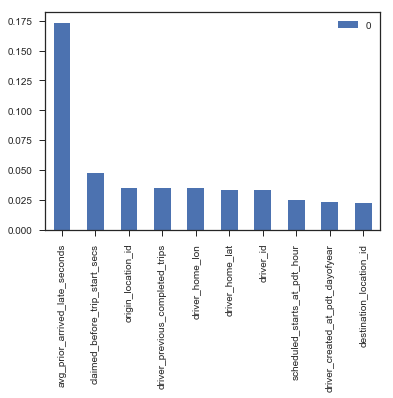

In [28]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [29]:
# score against TRAINING set
model.score(X_train,y_train)

0.2888052267156406

In [30]:
# score against TEST set
model.score(X_test,y_test)

0.2585993184978693

In [31]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25135

In [32]:
type(model_y_test_pred)

numpy.ndarray

In [33]:
model_y_test_pred[:10]

array([-114.95344448, -197.87626334, -815.34333596, -345.67755176,
       -284.60035075, -284.06412118, -255.5459281 , -432.15729758,
       -849.20471326, -336.15643824])

In [34]:
pd.Series(model_y_test_pred).std()

256.8197513172395

In [35]:
pd.Series(model_y_test_pred).corr(y_test)

-0.011136453145618811

In [36]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.259 7.35 194564 0.259 321 232 3.87


In [37]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [38]:
np.digitize(y_test, bins)[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [39]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21156]
 [    1  2939]
 [    2   892]
 [    3   148]]


In [40]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 24822]
 [    1   245]
 [    2    54]
 [    3    14]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92     21156
          1       0.43      0.04      0.07      2939
          2       0.41      0.02      0.05       892
          3       0.50      0.05      0.09       148

avg / total       0.78      0.84      0.78     25135



In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21041   106     8     1]
 [ 2820   105    11     3]
 [  843    24    22     3]
 [  118    10    13     7]]


In [43]:
type(model_y_test_pred)

numpy.ndarray

In [44]:
type(y_test)

pandas.core.series.Series

In [45]:
model_y_test_residual=y_test-model_y_test_pred
type(model_y_test_residual)

pandas.core.series.Series

In [46]:
model_y_test_residual.head(20)

4070       315.953444
29053      256.876263
26189      152.343336
24895       97.677552
38392       43.600351
86738      495.064121
24701      177.545928
66194      171.157298
74410      877.204713
10191      123.156438
72066       45.522870
58576     -658.823539
58814     -428.901522
85762     -808.835392
107806      23.930103
87394      896.089303
62099    -1122.188922
82953      123.733140
120247    -143.610678
77071      221.119880
Name: 1, dtype: float64

In [47]:
model_y_test_residual.mean()

-0.07660095149875763

In [48]:
model_y_test_residual.std()

441.1026167639028

Text(0.5,1,'Residual Lateness v. Hour of Scheduled Start of Trip')

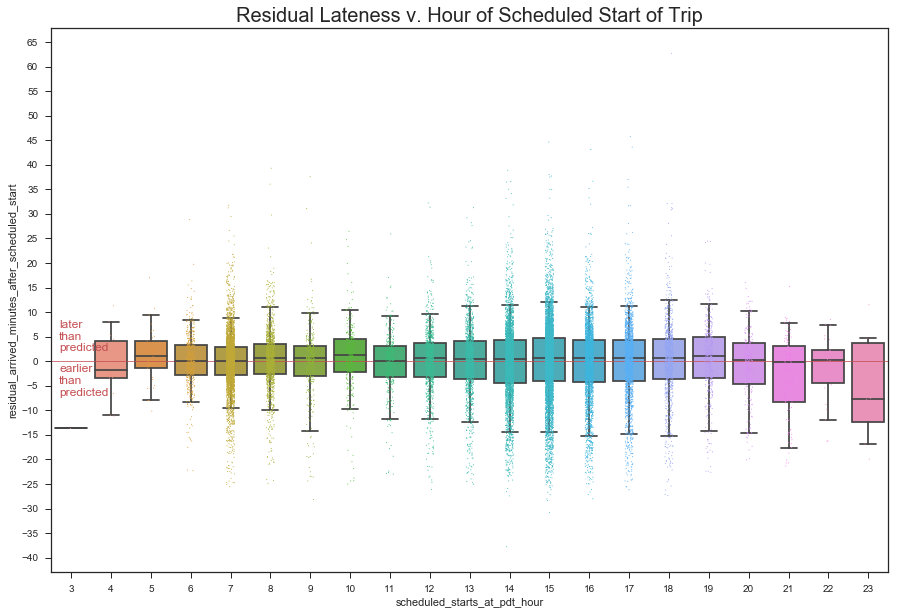

In [49]:
# redo above plot using residual instead of lateness itself (on test set instead of training+testset)
# start_hr vs residual lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y_test=pd.DataFrame()
df_y_test['residual_arrived_minutes_after_scheduled_start']=model_y_test_residual/60.0 # convert seconds to minutes
sns.stripplot(x=X_test['scheduled_starts_at_pdt_hour'], y=df_y_test['residual_arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=X_test['scheduled_starts_at_pdt_hour'], y=df_y_test['residual_arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
plt.text(-0.3,  2,  'later\nthan\npredicted',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-0.3, -7, 'earlier\nthan\npredicted', color='r', fontsize=12)  # annotate below 0.0 as early
xstart, xend = plt.gca().get_xlim()
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
ystart, yend = plt.gca().get_ylim()
plt.yticks(np.arange(int(ystart/5)*5, yend+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Residual Lateness v. Hour of Scheduled Start of Trip', fontsize=20)

This show prediction variance is large. Prediction is poor. Bias is ok.


In [50]:
df_y_test['residual_arrived_minutes_after_scheduled_start'].mean()

-0.001276682524979319

In [51]:
df_y_test['residual_arrived_minutes_after_scheduled_start'].std()

7.351710279398364

(16263, 2)


Text(0.5,1,'Residual Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)')

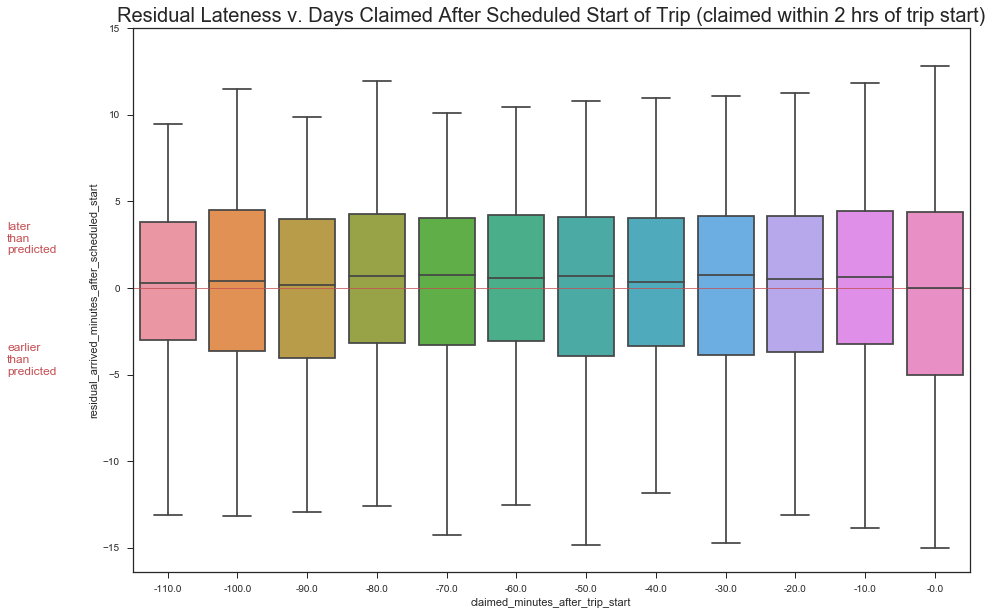

In [52]:
# redo above plot using residual instead of lateness itself (on test set instead of training+testset)
# claimed_before_trip_start_secs vs residual lateness
# lets zoom in on the day of the ride and do boxplot by 10 min for last 2 hours
plt.figure(figsize=(15,10)) # super-size the figure
##df_y_test=pd.DataFrame()
##df_y_test['residual_arrived_minutes_after_scheduled_start']=model_y_test_residual/60.0 # convert seconds to minutes
df_test_xadj=pd.DataFrame()
df_test_xadj['claimed_minutes_after_trip_start']=(-X_test['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to minutes
df_test_xy=pd.DataFrame()
df_test_xy['claimed_minutes_after_trip_start']=df_test_xadj['claimed_minutes_after_trip_start'].round(-1)
df_test_xy['residual_arrived_minutes_after_scheduled_start']=df_y_test['residual_arrived_minutes_after_scheduled_start']
df_test_xy_day_of_trip=df_test_xy[df_test_xy.claimed_minutes_after_trip_start > -120.0]
print(df_test_xy_day_of_trip.shape)
sns.boxplot(x='claimed_minutes_after_trip_start', y='residual_arrived_minutes_after_scheduled_start', data=df_test_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.15*(xend-xstart)),  2, 'later\nthan\npredicted',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.15*(xend-xstart)), -5, 'earlier\nthan\npredicted', color='r', fontsize=12) # annotate below 0.0 as early
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
ystart, yend = plt.gca().get_ylim()
plt.yticks(np.arange(int(ystart/5)*5, yend+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Residual Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)', fontsize=20)

This tells us median trip is about 1 min later arriving than predicted; observe the longer wiskers (5 percentile to  to 95 percentile). Variance gets worse within 10 minutes of scheduled start. And even worse than shown because of last-minute cancels which are not shown.

### analyze distribution of lateness among drivers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a459a0eb8>]],
      dtype=object)

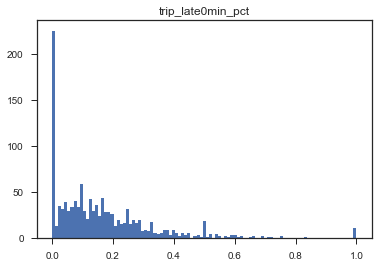

In [53]:
# do a small subset of drivers contribute to most of the lateness?
df_xy['driver_id']=df_X['driver_id'].astype(int)
df_xy['is_late_0min']=df_xy['arrived_minutes_after_scheduled_start'].apply(lambda a: a>0)
##df_xy.head(20)
df_xy_by_driver = df_xy.groupby('driver_id')
##df_xy_by_driver['is_late'].mean()  ##.apply(lambda x: "{0:.2f}%".format(x*100))
##df_xy_by_driver['is_late'].sum().astype(int) #show how many times each driver was late
##df_xy.loc[df_xy['driver_id']==62973].groupby('is_late').count()
df_xy_agg_by_driver=pd.DataFrame()
df_xy_agg_by_driver['trip_late0min_pct'] = df_xy_by_driver['is_late_0min'].mean()
df_xy_agg_by_driver['trip_count'] = df_xy_by_driver['is_late_0min'].count().astype(int)
df_xy_agg_by_driver['trip_late0min_count'] = df_xy_by_driver['is_late_0min'].sum().astype(int)
df_xy_agg_by_driver.head(20)
df_xy_agg_by_driver.hist(column='trip_late0min_pct',bins=np.linspace(0,1,100),grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a45f5f358>]],
      dtype=object)

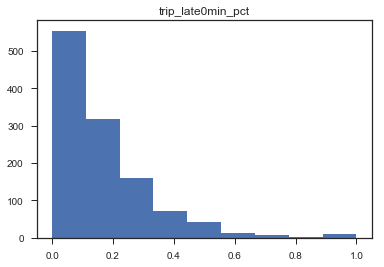

In [54]:
# decile bins of drivers %lateness
##df_xy_agg_by_driver.sort_values(by=['trip_late0min_pct'],ascending=False).head(100)
df_xy_agg_by_driver.hist(column='trip_late0min_pct',bins=np.linspace(0,1,10),grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a45e43cc0>]],
      dtype=object)

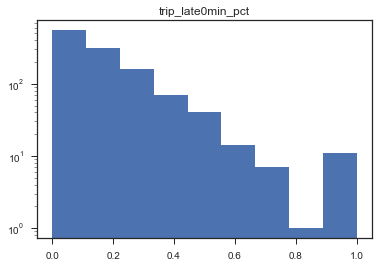

In [63]:
# decile bins of drivers %lateness on log scale; very linear relationship
df_xy_agg_by_driver.hist(column='trip_late0min_pct',bins=np.linspace(0,1,10),grid=False,log=True)

In [55]:
# find deciles of late drivers... top 20% are late more than 25% of the time
df_xy_agg_by_driver.trip_late0min_pct.quantile(np.linspace(.1, 1, 9, 0), 'lower').apply(lambda x: "{0:.2f}%".format(x*100))

0.1     0.00%
0.2     1.84%
0.3     5.30%
0.4     8.70%
0.5    12.16%
0.6    15.56%
0.7    19.57%
0.8    25.48%
0.9    36.00%
Name: trip_late0min_pct, dtype: object

In [56]:
# this isnt right either!!! top 20% of drivers had 24 or more late trips.
df_xy_agg_by_driver.trip_late0min_count.quantile(np.linspace(.1, 1, 9, 0), 'lower').astype(int)
# above does not say that N% of drivers cause M% of lateness because some drivers drive a lot more than others.
# so what do we really want to know is ... 

0.1     0
0.2     1
0.3     1
0.4     3
0.5     4
0.6     8
0.7    14
0.8    24
0.9    48
Name: trip_late0min_count, dtype: int64

In [57]:
# average driver is late 16% of the time and 5 min late 5% of the time, 15 min late 1% of the time
df_xy['is_late_5min']=df_xy['arrived_minutes_after_scheduled_start'].apply(lambda a: a>5)
df_xy_agg_by_driver['trip_late5min_pct'] = df_xy_by_driver['is_late_5min'].mean()
df_xy_agg_by_driver['trip_late5min_pct'] = df_xy_by_driver['is_late_5min'].mean()
df_xy_agg_by_driver['trip_late5min_count'] = df_xy_by_driver['is_late_5min'].sum().astype(int)
# 15 min late
df_xy['is_late_15min']=df_xy['arrived_minutes_after_scheduled_start'].apply(lambda a: a>15)
df_xy_agg_by_driver['trip_late15min_pct'] = df_xy_by_driver['is_late_15min'].mean()
df_xy_agg_by_driver['trip_late15min_pct'] = df_xy_by_driver['is_late_15min'].mean()
df_xy_agg_by_driver['trip_late15min_count'] = df_xy_by_driver['is_late_15min'].sum().astype(int)
df_xy_agg_by_driver.describe()


,trip_late0min_pct,trip_count,trip_late0min_count,trip_late5min_pct,trip_late5min_count,trip_late15min_pct,trip_late15min_count
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.158539,106.866497,16.861395,0.050060,4.338435,0.010268,0.646259
std,0.166126,169.260977,32.409303,0.089904,8.609115,0.043439,1.334595
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037037,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.121622,40.000000,4.000000,0.022760,1.000000,0.000000,0.000000
75%,0.227273,124.250000,19.000000,0.065058,5.000000,0.005755,1.000000
max,1.000000,1472.000000,431.000000,1.000000,117.000000,1.000000,10.000000


In [58]:
# look at the drivers with the most late trips
df_xy_agg_by_driver.sort_values('trip_late0min_count',ascending=False).head()

,trip_late0min_pct,trip_count,trip_late0min_count,trip_late5min_pct,trip_late5min_count,trip_late15min_pct,trip_late15min_count
driver_id,,,,,,,
101590,0.292799,1472,431,0.079484,117,0.004755,7
116837,0.374468,705,264,0.059574,42,0.004255,3
109966,0.403915,562,227,0.065836,37,0.000000,0
120791,0.472284,451,213,0.119734,54,0.017738,8
114677,0.391791,536,210,0.091418,49,0.005597,3


In [59]:
# look at the drivers with the most 5 minute late trips
df_xy_agg_by_driver.sort_values('trip_late5min_count',ascending=False).head()

,trip_late0min_pct,trip_count,trip_late0min_count,trip_late5min_pct,trip_late5min_count,trip_late15min_pct,trip_late15min_count
driver_id,,,,,,,
101590,0.292799,1472,431,0.079484,117,0.004755,7
63130,0.233374,827,193,0.095526,79,0.010883,9
113060,0.378968,504,191,0.113095,57,0.007937,4
100046,0.318907,439,140,0.127563,56,0.020501,9
120791,0.472284,451,213,0.119734,54,0.017738,8


In [60]:
# look at the drivers with the most 15 minute late trips; yow these numbers are big but 1 or 2 % of trips 
# except id=112273,112589
df_xy_agg_by_driver.sort_values('trip_late15min_count',ascending=False).head(20)

,trip_late0min_pct,trip_count,trip_late0min_count,trip_late5min_pct,trip_late5min_count,trip_late15min_pct,trip_late15min_count
driver_id,,,,,,,
129888,0.134683,1136,153,0.043134,49,0.008803,10
111157,0.187956,548,103,0.069343,38,0.018248,10
63130,0.233374,827,193,0.095526,79,0.010883,9
100046,0.318907,439,140,0.127563,56,0.020501,9
120795,0.243767,361,88,0.105263,38,0.024931,9
133747,0.336066,488,164,0.102459,50,0.018443,9
112273,0.479452,73,35,0.342466,25,0.123288,9
120791,0.472284,451,213,0.119734,54,0.017738,8
147558,0.230303,495,114,0.086869,43,0.016162,8


### where to go from here with late driver identification
question about drivers needs to be re-formulated to fit intervention plan with weekly cadence. 
this is different than predicting which trip+driver will be late.
could try to predict which drivers will be later thn others? 
 ... using prior late trips? in a time period or with decaying weights?
 treatments need to be a/b tested
 identify other metrics to keep driver pool healthy
 policy which reduces lateness and does not harm retention and other metrics too much?
 plus some of these are replacement drivers assigned in last hour, those trips should not be counted
 some of these drivers were removed from platform; this data is biased; add removal actions to this data set


In [61]:
# find deciles of late 5 MIN drivers... top 20% are 5 MIN late more than 8% of the time
df_xy_agg_by_driver.trip_late5min_pct.quantile(np.linspace(.1, 1, 9, 0), 'lower').apply(lambda x: "{0:.2f}%".format(x*100))

0.1     0.00%
0.2     0.00%
0.3     0.00%
0.4     1.05%
0.5     2.27%
0.6     3.62%
0.7     5.45%
0.8     7.92%
0.9    12.76%
Name: trip_late5min_pct, dtype: object

In [62]:
# find deciles of late 15 MIN drivers... top 20% are 15 MIN late more than 1% of the time
df_xy_agg_by_driver.trip_late15min_pct.quantile(np.linspace(.1, 1, 9, 0), 'lower').apply(lambda x: "{0:.2f}%".format(x*100))

0.1    0.00%
0.2    0.00%
0.3    0.00%
0.4    0.00%
0.5    0.00%
0.6    0.00%
0.7    0.24%
0.8    0.99%
0.9    2.44%
Name: trip_late15min_pct, dtype: object

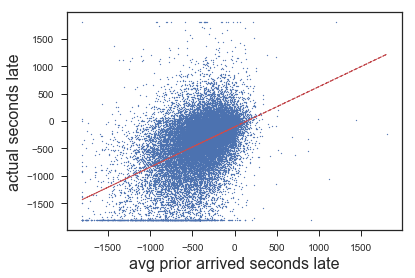

In [84]:
# plot scatter plot of avg_prior_arrived_late_seconds vs actual seconds late on test set
plt.scatter(X_test['avg_prior_arrived_late_seconds'], y_test, s=1)
plt.xlabel('avg prior arrived seconds late', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# trend line
z = np.polyfit(X_test['avg_prior_arrived_late_seconds'], y_test, 1)
p = np.poly1d(z)
plt.plot(X_test['avg_prior_arrived_late_seconds'], p(X_test['avg_prior_arrived_late_seconds']), "r--", lw=1)


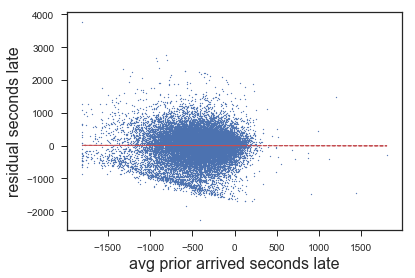

In [85]:
# plot scatter plot of avg_prior_arrived_late_seconds vs residual seconds late on test set
plt.scatter(X_test['avg_prior_arrived_late_seconds'], model_y_test_residual, s=1)
plt.xlabel('avg prior arrived seconds late', fontsize=16)
plt.ylabel('residual seconds late', fontsize=16)
# trend line
z = np.polyfit(X_test['avg_prior_arrived_late_seconds'], model_y_test_residual, 1)
p = np.poly1d(z)
plt.plot(X_test['avg_prior_arrived_late_seconds'], p(X_test['avg_prior_arrived_late_seconds']), "r--", lw=1)


y=0.022969x+(-421.822227)


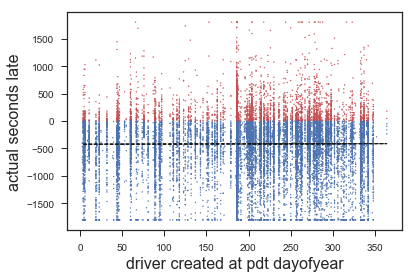

In [90]:
# plot scatter plot of driver_created_at_pdt_dayofyear vs actual seconds late on test set
colors = np.where(y_test > 0, 'r', 'b') # color late arrival red
plt.scatter(X_test['driver_created_at_pdt_dayofyear'], y_test, s=1, c=colors)
plt.xlabel('driver created at pdt dayofyear', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# trend line in black
z = np.polyfit(X_test['driver_created_at_pdt_dayofyear'], y_test, 1)
p = np.poly1d(z)
plt.plot(X_test['driver_created_at_pdt_dayofyear'], p(X_test['driver_created_at_pdt_dayofyear']), "k--", lw=1)
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
## arrival gets *slightly* later for drivers onboarded later in the year (0.023*dayofyear) which is < 1 second per month
## does not really tell me that late drivers cluster together based on on-boarding time
